# Module 2.5: SNN-MPR Comparison

Visualise the error between the MPR and SNN for each target frequency. Take the best fits. 

SNN files are available at 

https://www.dropbox.com/scl/fo/vv7lx16wdb3tcnn125ar2/ACWugwhwcVYstGZ81TcVIWQ?rlkey=xo57pfu62afvy75ts7makyr11&e=1&st=3x9bk27n&dl=0

Until 16/02/2026 MPR files are available at 

https://filesender.renater.fr/?s=download&token=5a124153-45f2-429d-8732-79e867588592

## 0.1 Import all built-in packages.

In [15]:
# Import necessary packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import zipfile
import seaborn as sns

import os
import datetime

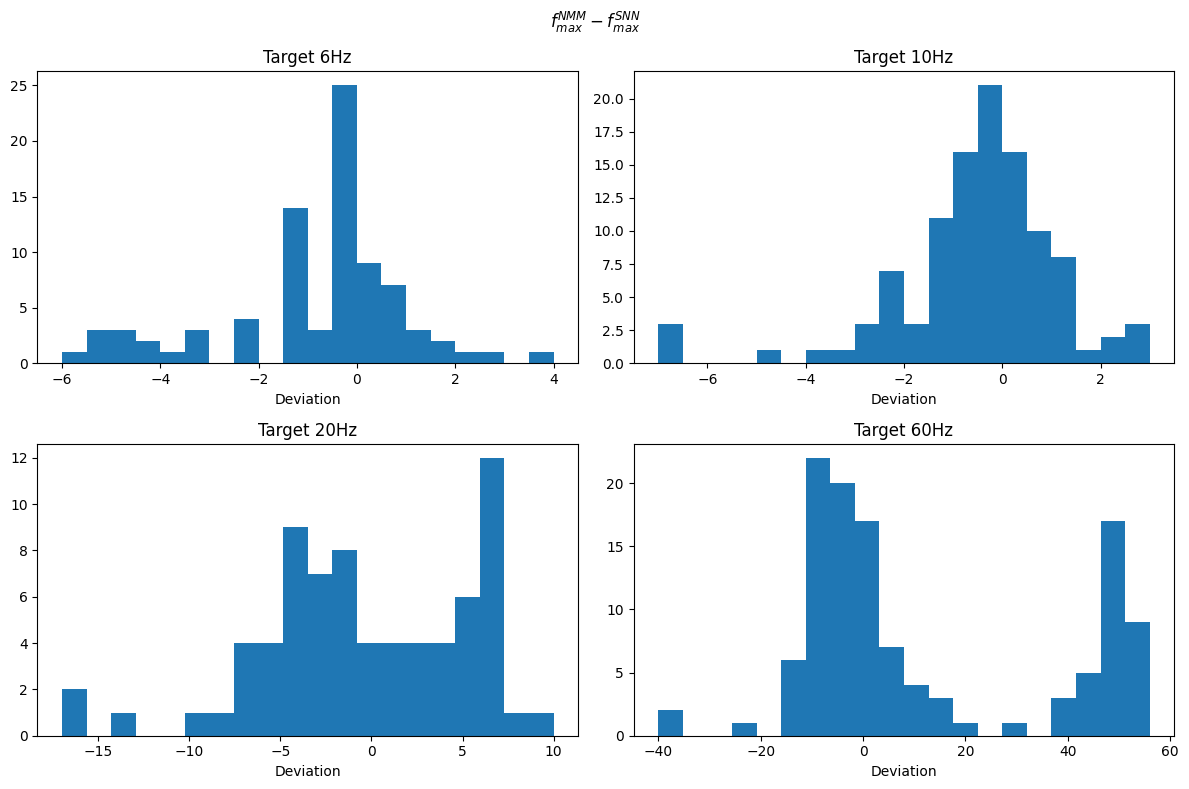

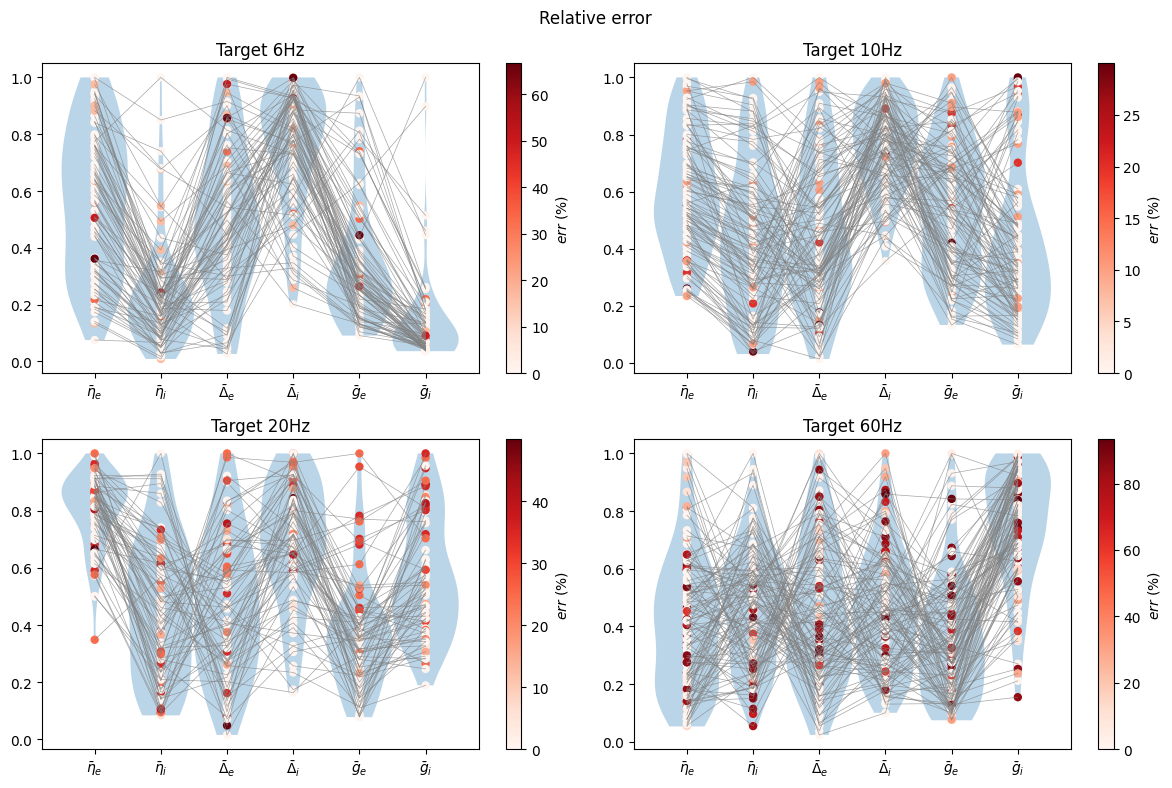

In [ ]:
fig = plt.figure(figsize=(12, 8))
fig.suptitle(r'$f^{NMM}_{max}-f^{SNN}_{max}$')

fig2 = plt.figure(figsize=(12, 8))
fig2.suptitle('Relative error')

for cnt, target_freq in enumerate([6, 10, 20, 60]):

    dataframe_file_name = 'param_freq_target_'+str(target_freq)+'.csv'

    data = pd.read_csv(dataframe_file_name)
    fits_errors = data.loc[data['fitness']< 0.1].copy()
    fits_errors.reset_index(drop = True, inplace = True)

    # fig.add_subplot(2,2,cnt+1)
    ax = fig.add_subplot(2,2,cnt+1)
    ax.hist(fits_errors['fmax_MPR_exc'] - fits_errors['fmax_SNN_exc'], bins=20)
    ax.set_xlabel('Deviation')
    ax.set_title('Target ' + str(target_freq) + 'Hz')

    array_params = np.zeros((len(fits_errors), 6))
    for i in range(len(fits_errors[fits_errors['fitness']< 0.1])):
        array_params[i] = np.array([fits_errors['ep_eta'][i]/np.max(fits_errors['ep_eta']), 
                                    fits_errors['ip_eta'][i]/np.max(fits_errors['ip_eta']), 
                                    fits_errors['ep_delta'][i]/np.max(fits_errors['ep_delta']), 
                                    fits_errors['ip_delta'][i]/np.max(fits_errors['ip_delta']), 
                                    fits_errors['sp_ge'][i]/np.max(fits_errors['sp_ge']), 
                                    fits_errors['sp_gi'][i]/np.max(fits_errors['sp_gi'])])
        

    positions = range(array_params.shape[1])
    
    # fig2.add_subplot(2,2,cnt+1)
    ax2 = fig2.add_subplot(2,2,cnt+1)
    # violin plot of parameter distributions
    ax2.violinplot(array_params, positions, showextrema=False, widths=1)

    # Now, plot the parameter values for all rows corresponding to the target frequency
    for i in range(len(fits_errors)):
        values = array_params[i]
        # Plot a gray line connecting the points for this row
        ax2.plot(positions, values, color='gray', linewidth=0.5, alpha=0.7)
        # Scatter plot for the points, colored by the error array_dif
    colors = np.repeat(fits_errors['error_freq_exc'], 6)
    scatter = ax2.scatter(np.tile(positions, (array_params.shape[0], 1)).flatten(), array_params.flatten(), c=colors, cmap='Reds', vmin=0, vmax=fits_errors['error_freq_exc'].max(), s=25, edgecolor=None)

    cbar = plt.colorbar(scatter)
    cbar.set_label('$err$ (%)')
    ax2.set_xticks(positions, [r'$\bar \eta_e$', r'$\bar \eta_i$', r'$\bar \Delta_e$', r'$\bar \Delta_i$', r'$\bar g_e$', r'$\bar g_i$'])
    ax2.tick_params(axis = 'y')
    ax2.set_title('Target ' + str(target_freq) + 'Hz')

# # Show the plot
fig.tight_layout()

fig2.tight_layout()
# plt.savefig(parameter_set_file+'_error_range'+str(target_freq)+'.png', dpi=600)